# Memory Leak Detection using Trend Analysis

In [1]:
import sys
sys.path.append('../')
import mem_leak_detection
import pandas as pd

In [5]:
# required only for ploting
import matplotlib.pyplot as plt
%matplotlib inline 
from pylab import rcParams
rcParams['figure.figsize']= 15,6

## Example 1

In [3]:
dataset = pd.read_csv('m_1935.csv', names=['timestamp', 'machine_id', 'mem_util_percent', 'label'], skiprows = 1)
dataset['timestamp'] =  pd.to_datetime(dataset['timestamp'])
dataset.set_index('timestamp', inplace=True)
dataset = mem_leak_detection.pre_processing(dataset)
dataset = pd.DataFrame(dataset.mem_util_percent.values)
mem_leak_detection.find_mem_leak(dataset).tail()

,value,label,trend
178,94.666667,Anomaly,93.246397
179,95.500000,Anomaly,93.374164
180,92.875000,Anomaly,93.501930
181,89.833333,Anomaly,93.629697
182,92.250000,Anomaly,93.757463


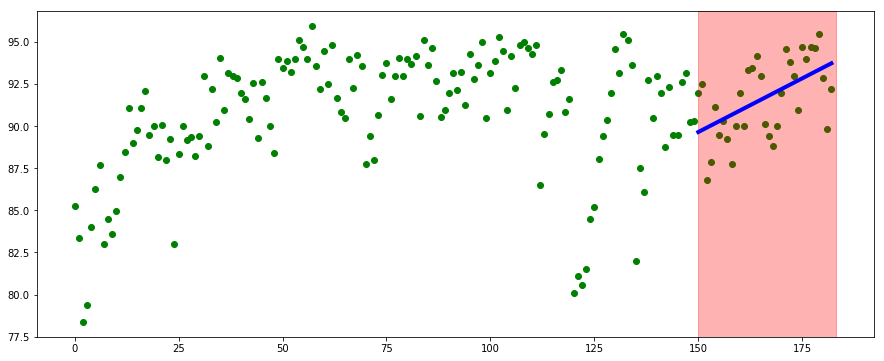

In [6]:
plt.scatter(dataset.index,dataset.value.values,   color='green')
plt.plot(dataset.loc[dataset['trend'] > 0].index,dataset.loc[dataset['trend'] > 0].trend.values,   color='blue', linewidth=4.0)
if(len(dataset.loc[dataset['trend'] > 0]) >0):
    plt.axvspan(dataset.loc[dataset['trend'] > 0].index[0], len(dataset.index), alpha=0.3, color='red')
plt.show()

## Example 2

In [7]:
dataset = pd.read_csv('data.csv', usecols=[1], engine='python', skipfooter=3)
mem_leak_detection.find_mem_leak(dataset).tail()

,value,label,trend
139,606,Anomaly,456.459286
140,508,Anomaly,459.132101
141,461,Anomaly,461.804916
142,390,Anomaly,464.477731
143,432,Anomaly,467.150547


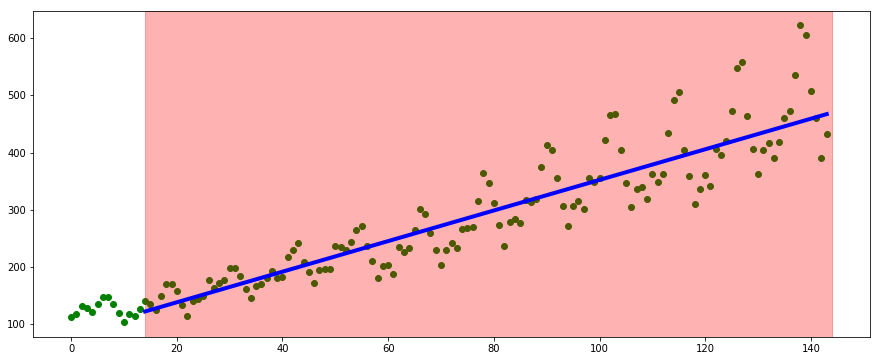

In [8]:
plt.scatter(dataset.index,dataset.value.values,   color='green')
plt.plot(dataset.loc[dataset['trend'] > 0].index,dataset.loc[dataset['trend'] > 0].trend.values,   color='blue', linewidth=4.0)
if(len(dataset.loc[dataset['trend'] > 0]) >0):
    plt.axvspan(dataset.loc[dataset['trend'] > 0].index[0], len(dataset.index), alpha=0.3, color='red')
plt.show()

## Example 3

In [9]:
dataset = pd.read_csv('m_1939.csv', names=['timestamp', 'machine_id', 'mem_util_percent', 'label'], skiprows = 1)
dataset['timestamp'] =  pd.to_datetime(dataset['timestamp'])
dataset.set_index('timestamp', inplace=True)
dataset = mem_leak_detection.pre_processing(dataset)
dataset = pd.DataFrame(dataset.mem_util_percent.values)
mem_leak_detection.find_mem_leak(dataset).tail()

,value,label,trend
173,94.000000,Normal,0
174,94.000000,Normal,0
175,93.750000,Normal,0
176,87.333333,Normal,0
177,85.016667,Normal,0


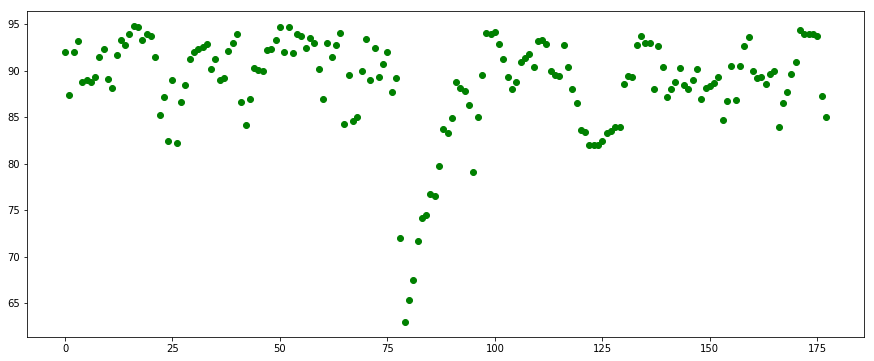

In [10]:
plt.scatter(dataset.index,dataset.value.values,   color='green')
plt.plot(dataset.loc[dataset['trend'] > 0].index,dataset.loc[dataset['trend'] > 0].trend.values,   color='blue', linewidth=4.0)
if(len(dataset.loc[dataset['trend'] > 0]) >0):
    plt.axvspan(dataset.loc[dataset['trend'] > 0].index[0], len(dataset.index), alpha=0.3, color='red')
plt.show()